# Importing Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from utils import *

warnings.simplefilter(action='ignore', category=Warning)

sns.set()

# Loading Data

In [2]:
# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Get column names for features and target
feature_names = data.feature_names
target_names = ["target"]

# Combine feature matrix X and target vector y into a single DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display the DataFrame
print(df.head())

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


# Resampling

In [3]:
np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], size=10)

array([ 6,  7,  7,  6, 10,  9, 10, 10, 10,  1])

# Computing a Bootstrap Replicate

In [6]:
bootstrap_sample = np.random.choice(df['target'], size=1000)

print('mean: ', np.mean(bootstrap_sample))
print('median: ', np.median(bootstrap_sample))
print('standard dev.: ', np.std(bootstrap_sample))

mean:  153.205
median:  141.0
standard dev.:  76.53504409745905


# Bootstrap Confidence Intervals

In [8]:
bootstrap_replicate_1d(df['target'], np.mean) # the function is available  in utils.py script.

152.45701357466064

In [9]:
# many bootstrap replicates
 
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(df['target'], np.mean)

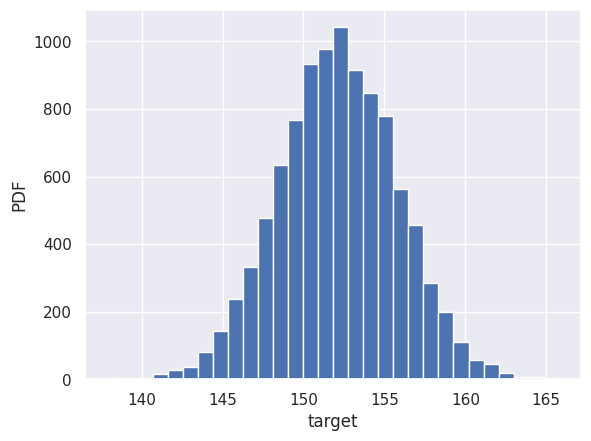

In [11]:
_ = plt.hist(bs_replicates, bins=30)
_ = plt.xlabel('target')
_ = plt.ylabel('PDF')
plt.show()

In [13]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

conf_int

array([145.04519231, 159.24468326])

# Pairs Bootstrap